# Week 4 Assignment

## Darin Young

### Predicting Fuel Efficiency using Linear Regression

### 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("auto-mpg.csv") # reads dataset into pandas dataframe
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 2. Begin by prepping the data for modeling:

#### Remove the car name column.

In [8]:
df = df.drop('car name', axis = 1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

To identify the reason that the horsepower column has been imported as string, I'll first take a look at all the unique values in the column to see if anything looks odd. 

In [11]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

This method worked well, because I was able to identify that there are rows in the horsepower column that contain a "?" value. So, I need to temporarily filter out those columns to calculate the mean value of the numeric values in the column. 

In [13]:
df_filtered = df[df['horsepower'] != "?"]
df_filtered['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

After removing the "?" rows, it seems all other values are numeric. However, the dtype is still showing "object" and not as int, so I'll go ahead and convert the column to numeric using pandas. 

In [15]:
df_filtered['horsepower'] = pd.to_numeric(df_filtered['horsepower'])

C:\Users\DarinPC\AppData\Local\Temp\ipykernel_3744\3314068635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['horsepower'] = pd.to_numeric(df_filtered['horsepower'])


In [16]:
df_filtered['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

Now that the column contains only numeric values, I can go ahead and calculate the mean value. 

In [18]:
mean_hp = df_filtered['horsepower'].mean()
print(f'The mean value for the horsepower column is: {mean_hp:.2f}')

The mean value for the horsepower column is: 104.47


To make things a little cleaner, I'd like to round the mean value to an even number so it matches the formatting of the other values in the column. 

In [20]:
mean_hp_rounded = mean_hp.astype(int)
mean_hp_rounded

104

Now that we have the mean value, we can replace the "?" rows with the mean value and progress with the remaining steps.

In [22]:
df['horsepower'] = df['horsepower'].replace("?", mean_hp_rounded)
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82], dtype=int64)

#### Create dummy variables for the origin column.

In [24]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

The origin column has three values: 1, 2, and 3. I'll use pandas get_dummies function to convert these values into three separate columns containing either 1/0. 

In [26]:
dummies = pd.get_dummies(df['origin'], prefix='origin')
dummies = dummies.astype(int) # convert values to integer so they show as 1/0 rather than true/false
df = pd.concat([df, dummies], axis=1) # combine columns with original dataframe

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,1,0,0


### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771543 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.839061  0.896017   
displacement -0.804203   0.950721      1.000000    0.893760  0.932824   
horsepower   -0.771543   0.839061      0.893760    1.000000  0.860676   
weight       -0.831741   0.896017      0.932824    0.860676  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684376 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411750 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.453613 -0.581024   
origin_1     -0.568192   0.604351      0.651407    0.486067  0.598398   
origin_2      0.259022  -0.352861     -0.373886   -0.281334 -0.298843   
origin_3      0.442174  -0.396479     -0.433505   -0.321232 -0.440817   

              acceleration  model year    origin  origin_1  origin_2  origin_3  
mpg               0.420289    0.579267  0.

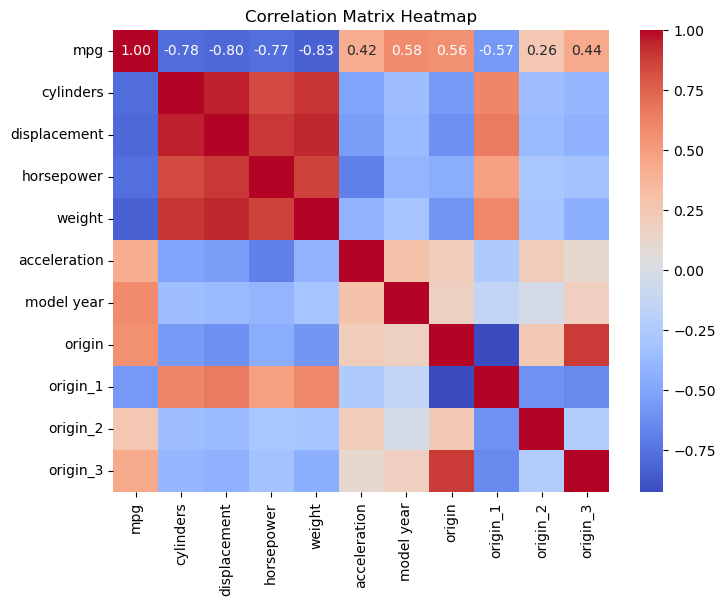

In [28]:
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

Judging by the correlation map, it seems that there are multiple features that are highly correlated with mpg. Cylinders, displacement, horsepower and weight all have a negative correlation of .75 or higher, which implies that lower values of each of those features results in higher values of mpg. Origin 1 also has a moderate negative correlation of -0.57. Finally, model year has a moderate positive correlation of 0.58, which makes sense because as model year increases (newer cars), mpg also increases. 

### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

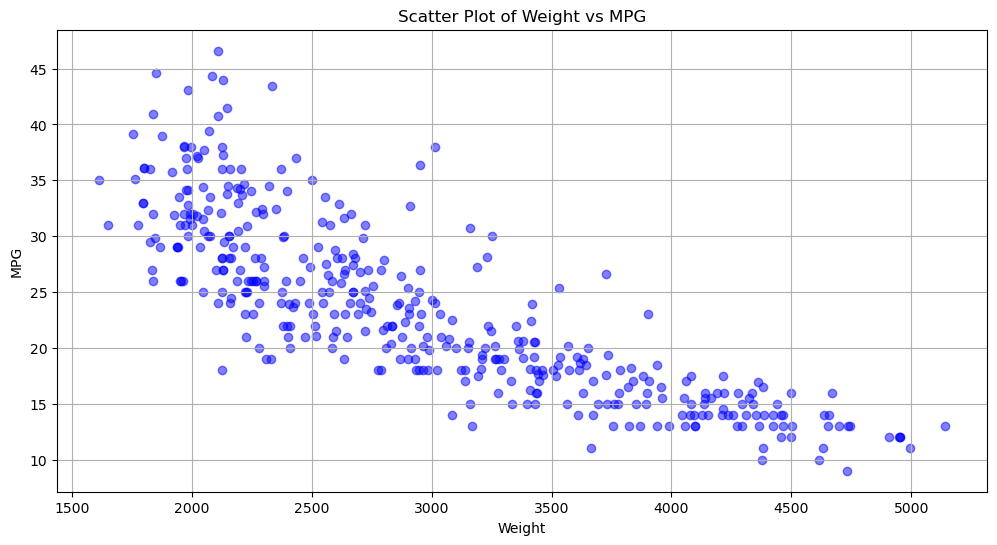

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(df['weight'], df['mpg'], color='blue', alpha=0.5)

plt.title('Scatter Plot of Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid()
plt.show()

Weight had the highest correlation (negative, in this case) as shown in the previous correlation matrix. This is clearly shown in the scatterplot above, as well. As weight increases, mpg decreases fairly consistently. 

### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[['weight']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Train an ordinary linear regression on the training data.

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [38]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Results:")
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Linear Regression Results:
Mean Squared Error: 14.89
R-squared: 0.72
Mean Absolute Error: 3.12


Considering that the MSE value is a squared error value, it's difficult to interpret it's importance in terms of model performance. However, R2 and MAE show that the model is fairly effective. An R2 value of 0.72 suggests that 72% of the variability in mpg can be explained by the car's weight. There's still room for more optimization, but 72% is quite high for R2, generally speaking. Additionally, the MAE value of 3.12 shows that the model's predicted value of mpg is, on average, 3.12 off from the actual value of mpg. This is fairly low and reinforces the effectiveness of the model.  

### 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [66]:
from sklearn.preprocessing import PolynomialFeatures

# transform the weight feature using polynomialfeatures
poly = PolynomialFeatures(degree=2) # experimented with multiple degrees - 2 was most effective. 
X_poly = poly.fit_transform(X)

# split the transformed data into new training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression Results:")
print(f"Degree of Polynomial: {poly.degree}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Polynomial Regression Results:
Degree of Polynomial: 2
Mean Squared Error: 13.15
Mean Absolute Error: 2.80
R-squared: 0.76


For this step, I chose to use a polynomial regression. Suprisingly, the R2 value actually increased, implying that there is a small (if any) exponential relationship between the two variables. I would argue that there is likely a logarithmic relationship. Mpg decreases as weight increases, but higher values of weight have an increasingly small impact on mpg as weight increases (cars can not have a negative mpg value, so the log curve would approach 0 - maybe - but never actually reach it). 